# Create a Simple MLP Model using Keras

Tensorflow is an opensource deep learning library developed by Google. It allows for the creation of dataflow graphs which describe how multidimensional data arrays move through a series of mathematical operations.

Keras is an opensource library developed as a wrapper for Tensorflow, which allows fast development of deep neural networks.

Let us start by creating a simple MLP model on the Boston housing Dataset. We shall make a sequential model, which means that each layer of neurons is linearly stacked on the previous one, with data flow in one direction only.

First, import the necessary libraries.

In [16]:
from keras.models import Sequential
from keras.datasets import boston_housing
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np


Next prepare the dataset.

In [5]:
(xtrain, ytrain), (xtest, ytest)=boston_housing.load_data()

Next we build the model by first defining it, then adding each layer one by one.

+ `input_dim`: specifies the input shape.
+ `units`: number of neurons in the layer.
+ `activation`: the activation function used in this layer.

In [6]:
def createModel(input_shape):
  # define a sequential model
  model=Sequential()

  # add the layers
  model.add(Dense(input_dim=input_shape, units=14, activation='relu', name='h1'))
  model.add(Dense(units=6, activation='relu', name='h2'))
  model.add(Dense(units=1, activation='linear', name='op'))

  # return the model
  return model

Now that we have defined a model, we can compile and train it.

In [10]:
model=createModel(xtrain.shape[1])
model.compile(optimizer='adam', loss='mse')
history=model.fit(xtrain, ytrain, epochs=100, batch_size=64)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4502.9775
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2354.6040 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1038.9528 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 494.4158 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 384.5183 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 373.5251 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 327.2475 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 318.3035 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 274.8531 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244.5997 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 215.5321 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200.5705 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174.7907 
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 168.6301 
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148.5407 

Check the performance of the model, by printing the mean squared error.

In [17]:
ypred=model.predict(xtest)
mse=np.mean((ypred-ytest)**2)
print("MSE: ", mse)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
MSE:  125.02297941547805


Plot the progression of training in terms of mean squared error.

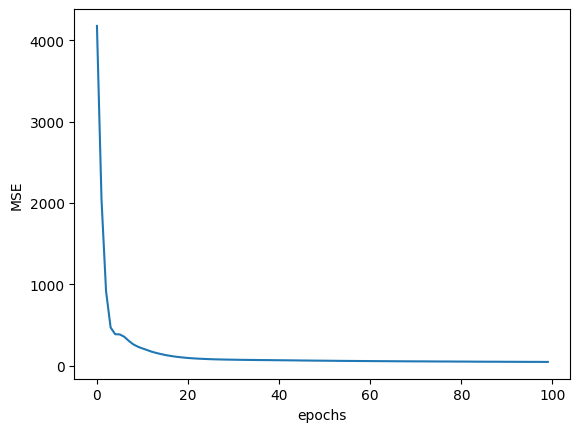

In [15]:
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.show()

We notice that the error decreases with each epoch, eventually flattening out to a constant value.